# Weekly Activity-Week 07

## Question

1. Read the data into python
2. Check for null values
3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and
   comment on your observations.
4. Carry out correlation analysis on the dataset and find the correlation factor
   between:
   
   a. ph and Chloramines
   
   b. ph and Conductivity
   
   What do we infer from this correlation value?

## Answer

In [1]:
# importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy.stats.stats import pearsonr

## 1. Reading the data into python

In [2]:
# reading data into python environment
data=pd.read_csv('Week_7_Activity_data.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843
2007,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
2008,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
2009,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [3]:
data.shape

(2011, 9)

* **there are 9 features in the dataset.**

## 2. Checking for the null values 

In [4]:
data.info

<bound method DataFrame.info of              ph    Hardness       Solids  Chloramines     Sulfate  \
0      8.316766  214.373394  22018.41744     8.059332  356.886136   
1      9.092223  181.101509  17978.98634     6.546600  310.135738   
2      5.584087  188.313324  28748.68774     7.544869  326.678363   
3     10.223862  248.071735  28749.71654     7.513408  393.663395   
4      8.635849  203.361523  13672.09176     4.563009  303.309771   
...         ...         ...          ...          ...         ...   
2006   8.989900  215.047358  15921.41202     6.297312  312.931021   
2007   6.702547  207.321086  17246.92035     7.708117  304.510230   
2008  11.491011   94.812545  37188.82602     9.263166  258.930600   
2009   6.069616  186.659040  26138.78019     7.747547  345.700257   
2010   4.668102  193.681736  47580.99160     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       363.266516       18.436525       100.341674   4.628771  
1       3

In [5]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

* **There is no null value present in the data set**

## 3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ 

In [6]:
data[['Hardness', 'Sulfate','Organic_carbon']].describe()

,Hardness,Sulfate,Organic_carbon
count,2011.000000,2011.000000,2011.000000
mean,195.968072,333.224672,14.357709
std,32.635085,41.205172,3.324959
min,73.492234,129.000000,2.200000
25%,176.744938,307.632511,12.124105
50%,197.191839,332.232177,14.322019
75%,216.441070,359.330555,16.683049
max,317.338124,481.030642,27.006707


In [7]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

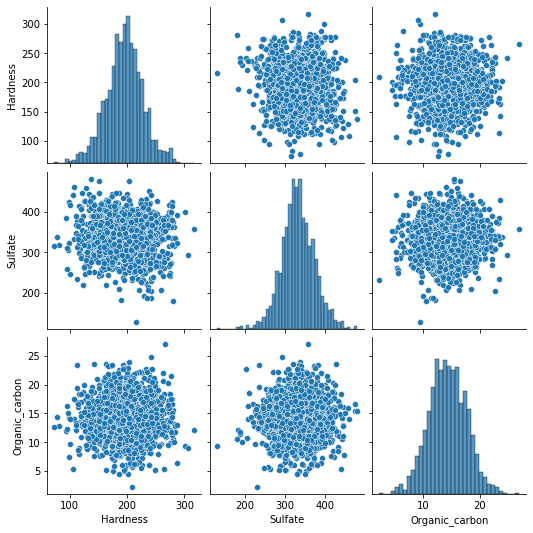

In [8]:
# plotting pairplot
sns.pairplot(data[['Hardness', 'Sulfate','Organic_carbon']])

array([[<AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Sulfate'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>, <AxesSubplot:>]],
      dtype=object)

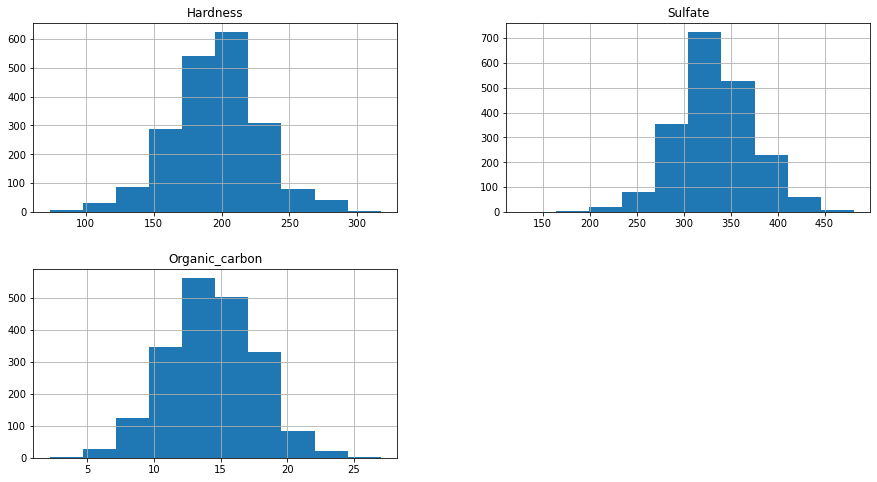

In [9]:
# plotting histogram
freqgraph=data[['Hardness', 'Sulfate','Organic_carbon']]
freqgraph.hist(figsize=(15,8))

### Observations:

* **All 3 are almost normally distributed.**
* **from the pairplot and histogram , we can see that the range of Organic_carbon is very small compared to Sulfate and Hardness.**
* **Mean and Standard deviation of Organic_carbon is very low compared to other two.(Mean=14.36,std=3.324).**
* **among 3,sulphate possess high value of mean and STandard deviation.(Mean=333.22,Std=41.21).**


## 4. Analysing correlation on the dataset and finding the correlation factor between:a. ph and Chloramines ,b. ph and Conductivity

**Checking the correlation of the entire data set**

In [10]:
corrmatrix=data.corr()
corrmatrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000


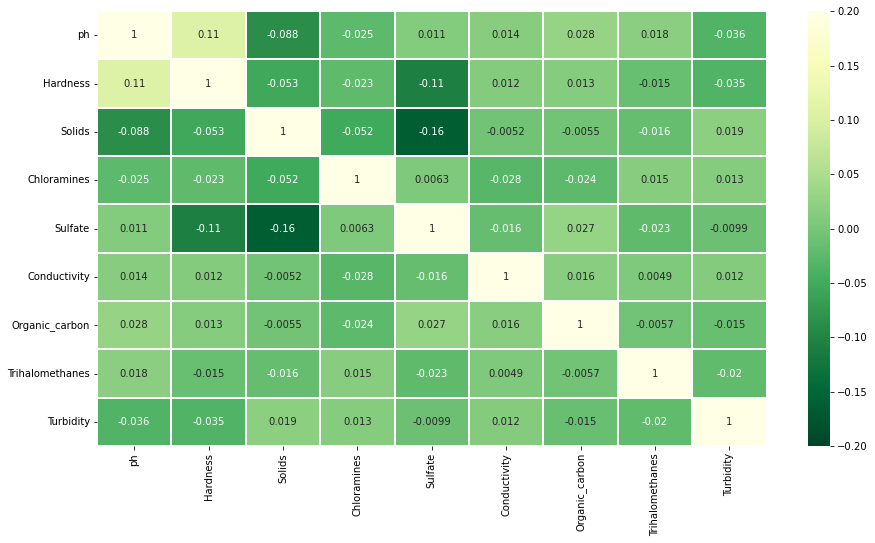

In [11]:
# plotting heatmap
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.2,annot=True,linewidth=0.2,cmap='YlGn_r')
plt.show()

### Inference:

* **There is no positive high correlation or negative high correlation between the variables.**
* **Sulfate and Solids show a low negative correlation of -1.6.** 

### a. Finding the Pearson correlation Coefficient between ph and Chloramines

<AxesSubplot:xlabel='ph', ylabel='Chloramines'>

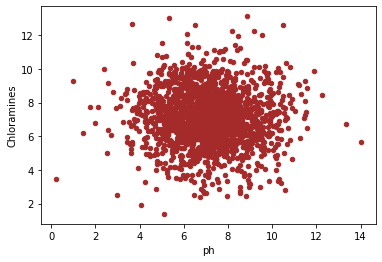

In [12]:
# plotting scatter plot
data.plot(kind='scatter',x='ph',y='Chloramines',color='brown')

In [13]:
# one method
ph=data['ph']
cl=data['Chloramines']
pearsonr_coefficient,p_value=pearsonr(ph,cl)
print('PearsonR Correlation Coefficient is : r= %0.3f'%(pearsonr_coefficient))

PearsonR Correlation Coefficient is : r= -0.025


In [14]:
# Another method
x=data[['ph','Chloramines']]
corr1=x.corr()
corr1

,ph,Chloramines
ph,1.000000,-0.024768
Chloramines,-0.024768,1.000000


### Inference:

* **The correlation coefficient of ph and conductivity is -0.025.**
* **from the coefficient we can conlclude that both have low negative correlation.its a weak correlation**
* **scatterplot shows that there is no liner correlation between them and values are clusterd.**

### b. Finding the  Pearson correlation Coefficient between ph and Conductivity

<AxesSubplot:xlabel='ph', ylabel='Conductivity'>

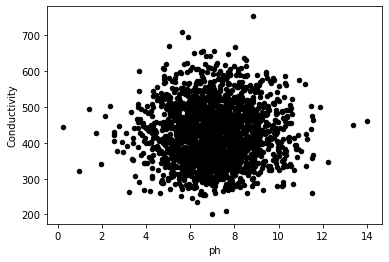

In [15]:
# plotting scatter plot
data.plot(kind='scatter',x='ph',y='Conductivity',color='black')

In [16]:
# one method
ph=data['ph']
cd=data['Conductivity']
pearsonr_coefficient,p_value=pearsonr(ph,cd)
print('PearsonR Correlation Coefficient is : r= %0.3f'%(pearsonr_coefficient))


PearsonR Correlation Coefficient is : r= 0.014


In [17]:
# Another method
y=data[['ph','Conductivity']]
corr2=y.corr()
corr2

,ph,Conductivity
ph,1.000000,0.014128
Conductivity,0.014128,1.000000


### Inference:

* **The correlation coefficient of ph and conductivity is 0.014.**
* **from the coefficient we can conlclude that both have low positive correlation.**
* **from the scatterplot we can see that there is no liner correlation between them and values are clusterd.**

Submitted by: **Shameema Muneer,DSA_Bach3**